In [1]:
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

2021-07-10 22:08:45.619518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-10 22:08:45.619556: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
def split_sequences(sequences, n_steps, states):
    x, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps

        if end_ix > len(sequences) - 1:
            break

        seq_x = sequences[i:end_ix, :]
        x.append(seq_x)
        y.append(states)

    return np.array(x), np.array(y)

def train_dataset_generate(subject):

    files = glob.glob("dataset/" + subject + "*.csv")
    states_arr = []
    print(files)
    input("FASKLJB")

    for i in range(len(files)):
        states = re.findall(r'-([^"]*)-', files[i])

        if states[0] == "relaxed":
            states = 0
        elif states[0] == "neutral":
            states = 0.5
        else:
            states = 1

        states_arr.append(states)

    data = {
        "dir": files,
        "states": states_arr
    }
    df = pd.DataFrame(data)

    return df

def create_sequences(dataset, n_steps):
    sequences_arr = np.empty((0, n_steps, 4))
    targets_arr = np.empty(0)
    attributes = [
        "TP9",
        "AF7",
        "AF8",
        "TP10"
    ]
    dir = np.array(dataset["dir"])
    states_arr = np.array(dataset["states"])
    for i in range(len(dir)):

       df = pd.read_csv(dir[i])
       sequences, target = split_sequences(np.array(df[attributes]), n_steps, states_arr[i])

       sequences_arr = np.append(sequences_arr, sequences, axis = 0)
       targets_arr = np.append(targets_arr, target)

    return sequences_arr, targets_arr

In [7]:
subjectname = "subjectb"
n_steps = 100
dataset = train_dataset_generate(subjectname)
x, y = create_sequences(dataset, n_steps)
n_features = x.shape[2]

['dataset/subjectb-relaxed-2.csv', 'dataset/subjectb-neutral-2.csv', 'dataset/subjectb-relaxed-1.csv', 'dataset/subjectb-concentrating-2.csv', 'dataset/subjectb-concentrating-1.csv', 'dataset/subjectb-neutral-1.csv']


FASKLJB 


In [8]:
model = Sequential()
model.add(Bidirectional(LSTM(128, input_shape=(n_steps, n_features))))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "mse", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(x, y, epochs = 2, validation_data = (x, y))

2021-07-10 22:11:57.652694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-10 22:11:57.652745: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-10 22:11:57.652787: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brian-pc-server2): /proc/driver/nvidia/version does not exist
2021-07-10 22:11:57.708088: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 125337600 exceeds 10% of free system memory.
2021-07-10 22:11:57.941194: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-10 22:11:57.958644: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3092945000 Hz


Epoch 1/2
2448/2448 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.6101

2021-07-10 22:15:25.547387: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 125337600 exceeds 10% of free system memory.


2448/2448 [==============================] - 274s 101ms/step - loss: 0.0086 - accuracy: 0.6101 - val_loss: 1.3605e-04 - val_accuracy: 0.6142
Epoch 2/2
2448/2448 [==============================] - 243s 99ms/step - loss: 3.2622e-04 - accuracy: 0.6136 - val_loss: 2.1980e-05 - val_accuracy: 0.6142


In [10]:
def test_dataset_generate(subject):

    files = glob.glob("dataset/" + subject + "*.csv")
    states_arr = []
    print(files)

    for i in range(len(files)):
        states = re.findall(r'-([^"]*)-', files[i])

        if states[0] == "relaxed":
            states = 0
        elif states[0] == "neutral":
            states = 0.5
        else:
            states = 1

        states_arr.append(states)

    data = {
        "dir": files,
        "states": states_arr
    }
    df = pd.DataFrame(data)

    return df

subjecttest = "subjecta"
dataset_test = test_dataset_generate(subjecttest)
x_test, y_test = create_sequences(dataset_test, n_steps)

['dataset/subjecta-concentrating-1.csv', 'dataset/subjecta-neutral-1.csv', 'dataset/subjecta-relaxed-1.csv', 'dataset/subjecta-neutral-2.csv', 'dataset/subjecta-relaxed-2.csv', 'dataset/subjecta-concentrating-2.csv']


In [11]:
_, accuracy = model.evaluate(x_test, y_test)
prediction = model.predict(x_test)
prediction = np.round(prediction.flatten(), 1)
data = {
    "Prediction": prediction,
    "Actual": y_test.flatten()
}
df = pd.DataFrame(data, columns = ["Prediction", "Actual"])
df.to_csv("2_btoa.csv")


2021-07-10 22:22:35.793219: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 142099200 exceeds 10% of free system memory.


2776/2776 [==============================] - 79s 28ms/step - loss: 0.0486 - accuracy: 0.5783


2021-07-10 22:23:54.612153: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 142099200 exceeds 10% of free system memory.


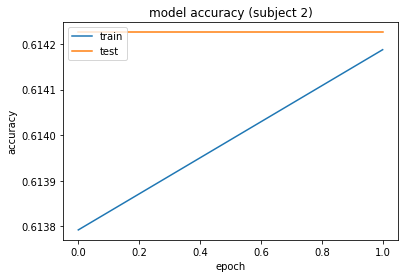

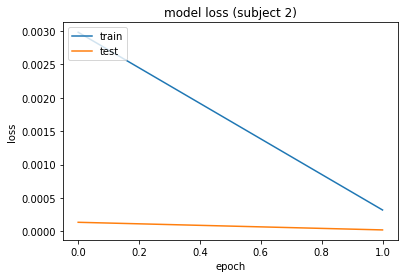

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy (subject 2)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss (subject 2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

0.7941494392649642


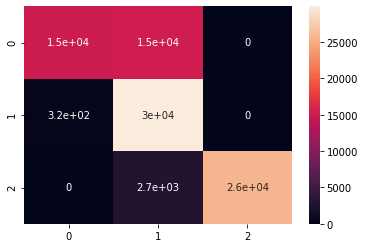

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

le = LabelEncoder()
df = pd.read_csv("2_btoa.csv")
actual = le.fit_transform(df["Actual"])
prediction = df["Prediction"].values
prediction_arr = []
for i in range(len(prediction)):

    if prediction[i] >= 0 and prediction[i] <= 0.2:
        val = 0
    elif prediction[i] > 0.2 and prediction[i] <= 0.7:
        val = 0.5
    elif prediction[i] > 0.7 and prediction[i] <= 1.0:
        val = 1

    prediction_arr.append(val)

prediction = le.fit_transform(prediction_arr)
print(accuracy_score(actual, prediction))
confusion_matrix = confusion_matrix(actual, prediction)
sns.heatmap(confusion_matrix, annot=True)
plt.show()